In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train,_),(x_test,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0,
                                                       scale=1.0,
                                                       size =x_train.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)

x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0,
                                                       scale=1.0,
                                                       size =x_test.shape)

x_test_noisy = np.clip(x_test_noisy,0.,1.)





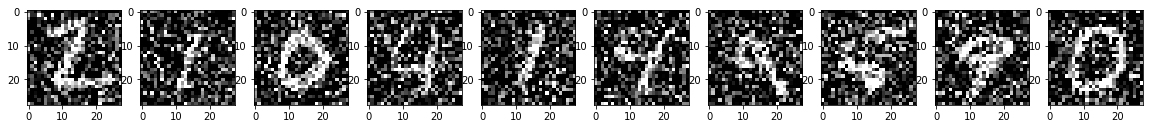

In [6]:
n =10

plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax = plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
plt.show()


In [7]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model

input_img = Input(shape=(28,28,1))

x = Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
#(28,28,32) because of padding same
x = MaxPooling2D((2,2))(x)
#(14,14,32)


x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2))(x)
#(7,7,32)

x = Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
#(7,7,32)
x = UpSampling2D((2,2))(x)
#(14,14,32)

x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
#(14,14,32)
x = UpSampling2D((2,2))(x)
#(28,28,32)

decode = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
#(28,28,1)

autoencoder = Model(input_img,decode)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

W0702 14:51:16.258110 139808898815872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 14:51:16.291883 139808898815872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 14:51:16.299355 139808898815872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 14:51:16.327105 139808898815872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0702 14:51:16.359884 139808898815872 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [8]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,
               batch_size=128,
               shuffle = True,
               validation_data =(x_test_noisy,x_test))

W0702 14:51:27.905039 139808898815872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.1778 - acc: 0.8026 - val_loss: 0.1223 - val_acc: 0.8106
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1184 - acc: 0.8101 - val_loss: 0.1110 - val_acc: 0.8091
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1113 - acc: 0.8113 - val_loss: 0.1061 - val_acc: 0.8115
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1080 - acc: 0.8119 - val_loss: 0.1043 - val_acc: 0.8107
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1059 - acc: 0.8122 - val_loss: 0.1035 - val_acc: 0.8106
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1040 - acc: 0.8125 - val_loss: 0.1050 - val_acc: 0.8127
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1029 - acc: 0.8127 - val_loss: 0.1022 - val_a

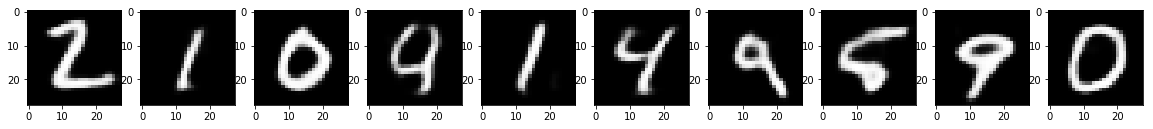

In [9]:
n =10
for i in range(n+1):
  arr = autoencoder.predict(x_test_noisy[:11])

plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax = plt.subplot(1,n,i)
  plt.imshow(arr[i].reshape(28,28))
  plt.gray()
plt.show()